In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [ ]:
# Load the Iris dataset
iris = load_iris()

In [ ]:
# We will only use the first two features (sepal length and sepal width) and the first 100 samples
X = iris.data[:100, :2]
y = iris.target[:100]

In [ ]:
# Define the perceptron function
def perceptron(X, y, learning_rate=0.1, epochs=100):
    # Initialize the weight vector to zeros
    w = np.zeros(X.shape[1])
    # Initialize the bias to zero
    b = 0
    # Loop over the specified number of epochs
    for epoch in range(epochs):
        # Loop over each sample in the dataset
        for i in range(X.shape[0]):
            # Calculate the predicted class label
            y_pred = np.dot(w, X[i]) + b
            if y_pred > 0:
                y_pred = 1
            else:
                y_pred = 0
            # Update the weights and bias if the predicted class label does not match the true class label
            if y[i] != y_pred:
                w += learning_rate * (y[i] - y_pred) * X[i]
                b += learning_rate * (y[i] - y_pred)
    # Return the weight vector and bias
    return w, b

In [ ]:
# Run the perceptron function
w, b = perceptron(X, y)

In [ ]:
# Create a meshgrid of points to visualize the decision boundary
xx, yy = np.meshgrid(np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 0.01),
                     np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 0.01))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], w) + b
Z = np.where(Z > 0, 1, 0)
Z = Z.reshape(xx.shape)

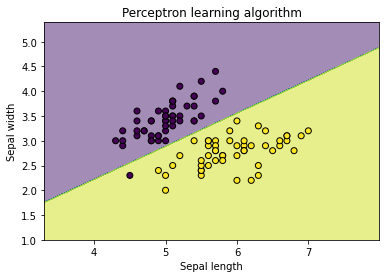

In [ ]:
# Plot the data points and decision boundary
plt.contourf(xx, yy, Z, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Perceptron learning algorithm')
plt.show()